In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score,f1_score

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('tatanic_train.csv')
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- here we can observe that there are huge null data in cabin feature hence dropping that feature is the best option 
- the feature name is not useful for survival prediction hence dropping that feature is always an option

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.drop(['Name', 'Cabin'], axis=1,inplace=True)
df.shape

(891, 10)

In [8]:
df['Age'].fillna(value=np.floor(np.mean(df.Age)),inplace=True)

- here we are imputing the null data with floor or ceil of mean becuase we have observed that the mean and 50% are close in descirbe method.
- also imputing with mean is frist priority than median and mode

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(889, 10)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


- Here we are dropping teh column Tickit because we know that we aren't get any info from tickit no also we have class data which is more useful hence droping tickit column

In [12]:
df.drop(['Ticket'],1,inplace=True)

In [13]:
df.shape

(889, 9)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### data Transformation

In [15]:
binary = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(binary)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [17]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
binary = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(binary)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.514252,0.524184,0.382452,32.096681,0.362205
std,256.998173,0.486260,0.834700,0.477538,12.970884,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [24]:
df['Age'] = scaler.fit_transform(df[['Age']])

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0.271174,1,0,0.014151,0
1,2,1,1,0,0.472229,1,0,0.139136,1
2,3,1,3,0,0.321438,0,0,0.015469,0
3,4,1,1,0,0.434531,1,0,0.103644,0
4,5,0,3,1,0.434531,0,0,0.015713,0


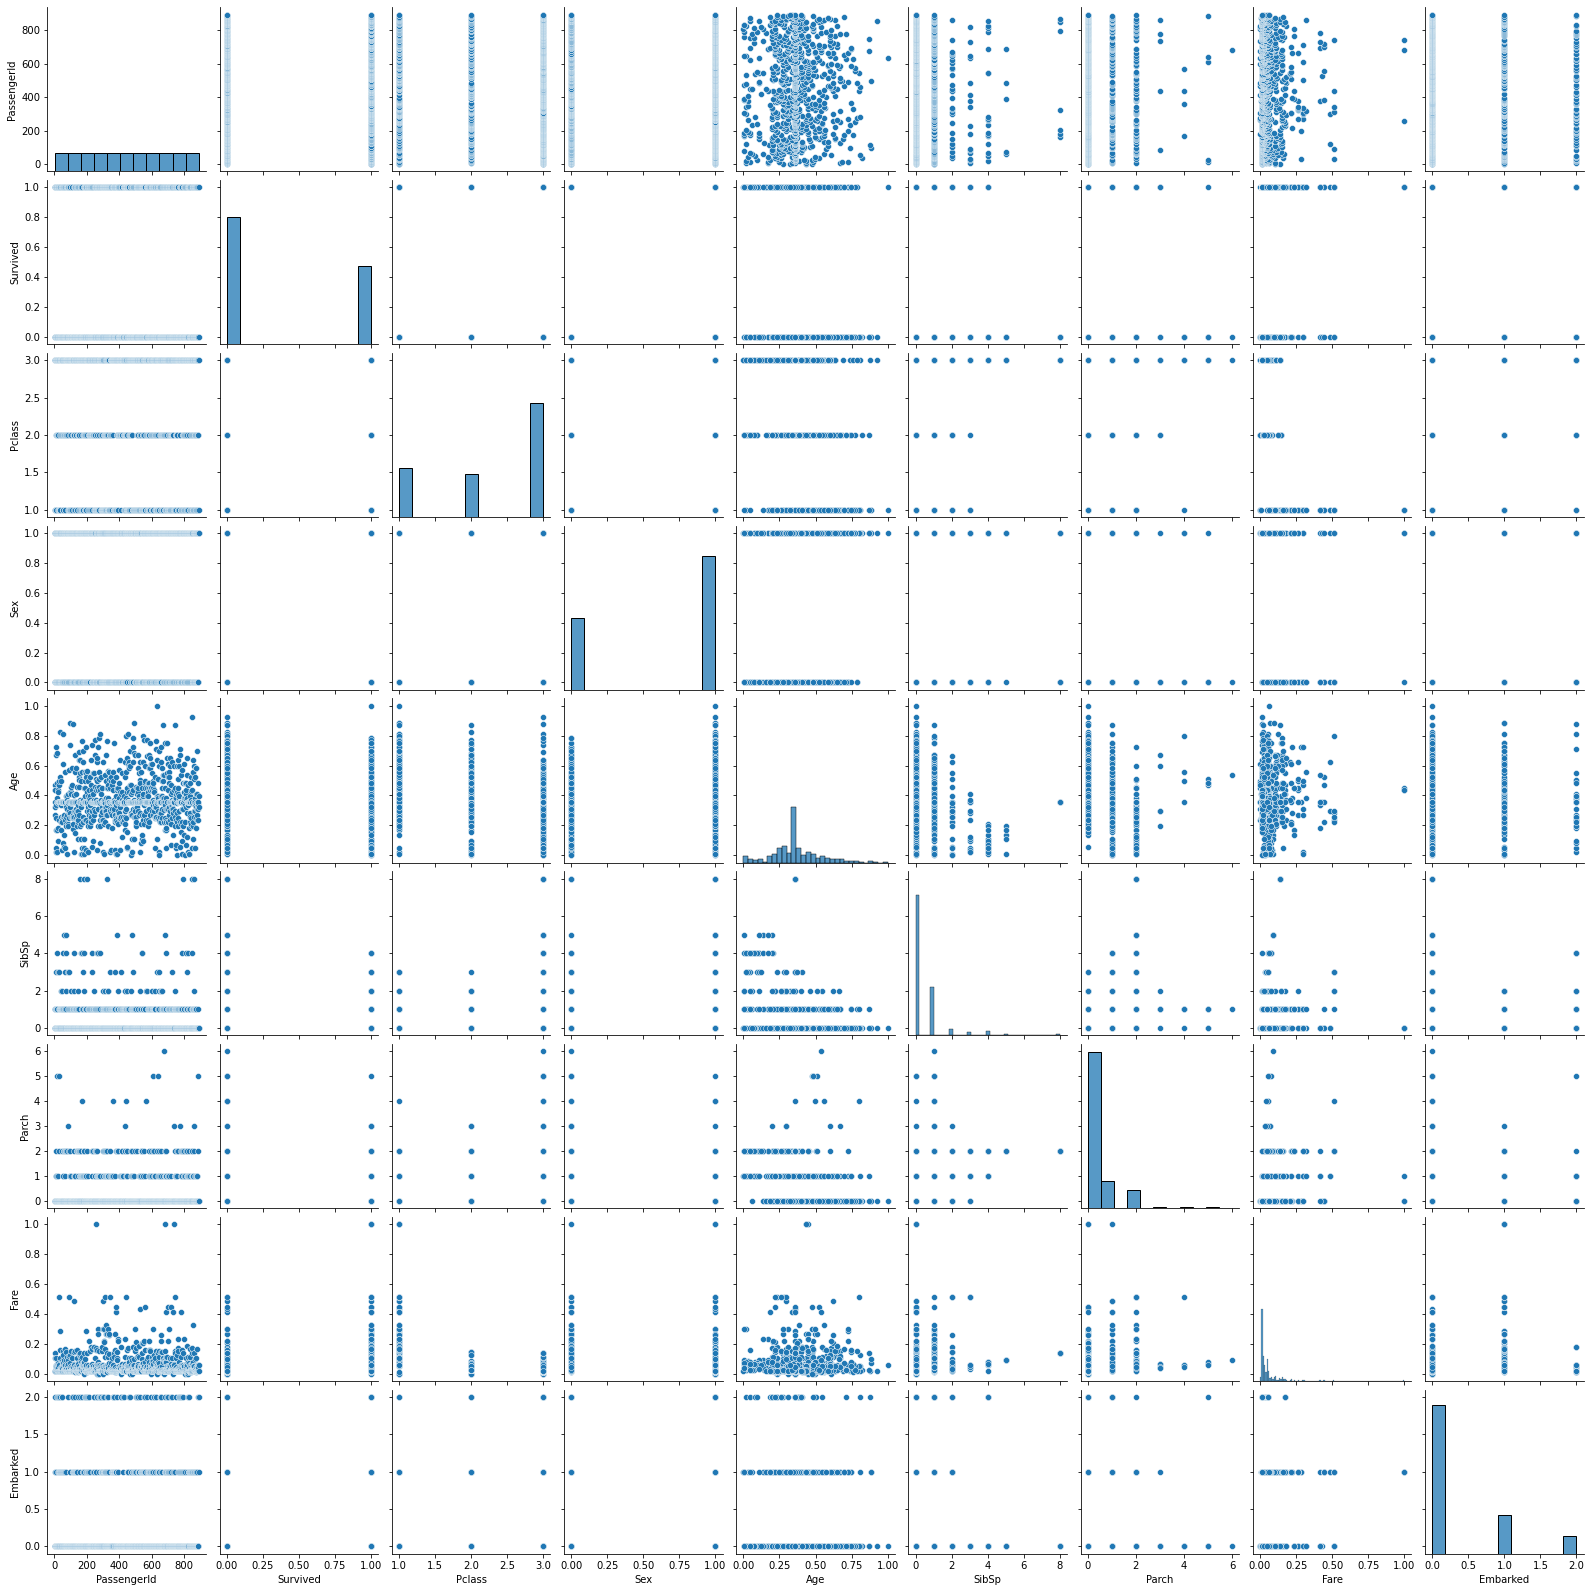

In [26]:
sns.pairplot(df)

###  Model Training

In [27]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((711, 8), (178, 8), (711,), (178,))

In [91]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
273,274,1,1,0.459663,0,1,0.057971,1
289,290,3,0,0.271174,0,0,0.015127,2
155,156,1,1,0.635587,0,1,0.119804,1
172,173,3,0,0.007288,1,1,0.021731,0
271,272,3,1,0.308872,0,0,0.000000,0


In [63]:
from sklearn.svm import SVC

In [30]:
svc = SVC()
svc.fit(X_train,y_train)

y_train_pred =svc.predict(X_train)
print(classification_report(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

print('\n\n')

y_test_pred =svc.predict(X_test)
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       440
           1       0.00      0.00      0.00       271

    accuracy                           0.62       711
   macro avg       0.31      0.50      0.38       711
weighted avg       0.38      0.62      0.47       711

0.6188466947960619
[[440   0]
 [271   0]]



              precision    recall  f1-score   support

           0       0.61      1.00      0.76       109
           1       0.00      0.00      0.00        69

    accuracy                           0.61       178
   macro avg       0.31      0.50      0.38       178
weighted avg       0.37      0.61      0.47       178

0.6123595505617978
[[109   0]
 [ 69   0]]


In [31]:
svc = SVC(C=1,kernel='linear',probability=True,random_state=42)
svc.fit(X_train,y_train)

y_train_pred =svc.predict(X_train)
print(classification_report(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

print('\n\n')

y_test_pred =svc.predict(X_test)
print(classification_report(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       440
           1       0.75      0.66      0.70       271

    accuracy                           0.79       711
   macro avg       0.78      0.76      0.77       711
weighted avg       0.79      0.79      0.78       711

0.7876230661040787
[[382  58]
 [ 93 178]]



              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178

0.8033707865168539
[[90 19]
 [16 53]]


In [32]:
def eval_metrics(target,prob,threshold):        
        data=pd.DataFrame()
        data['pred_proba'] = pd.Series(prob)
        data['pred'] = data['pred_proba'].map(lambda x: 1.0 if x > threshold else 0.0)
        accuracy=metrics.accuracy_score(target,data['pred'])
        precision= metrics.precision_score(target,data['pred'])
        recall= metrics.recall_score(target,data['pred'])
        f1_score = metrics.f1_score(target,data['pred'])
        roc_auc = metrics.roc_auc_score(target,data['pred'])
        return(accuracy,precision,recall,f1_score,roc_auc)

In [33]:
pred_train_svc = svc.predict_proba(X_test)[:,1]
thre = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for th in thre:   
    accuracy,precision,recall,f1_score,roc_auc = eval_metrics(y_test,pred_train_svc,th)
    print('='*25 , th , '='*25)
    print('Accuracy = ',accuracy)
    print('Precision = ',precision)
    print('Recall = ',recall)
    print('f1 score = ',f1_score)
    print('roc auc = ',roc_auc)
    print('='*50)
    print('\n')

========================= 0.1 =========================
Accuracy =  0.43258426966292135
Precision =  0.40588235294117647
Recall =  1.0
f1 score =  0.5774058577405858
roc auc =  0.536697247706422


========================= 0.2 =========================
Accuracy =  0.7134831460674157
Precision =  0.5865384615384616
Recall =  0.8840579710144928
f1 score =  0.7052023121387283
roc auc =  0.744781279085228


========================= 0.3 =========================
Accuracy =  0.7865168539325843
Precision =  0.6823529411764706
Recall =  0.8405797101449275
f1 score =  0.7532467532467533
roc auc =  0.7964366440632893


========================= 0.4 =========================
Accuracy =  0.797752808988764
Precision =  0.726027397260274
Recall =  0.7681159420289855
f1 score =  0.7464788732394365
roc auc =  0.7923148517484376


========================= 0.5 =========================
Accuracy =  0.8033707865168539
Precision =  0.7361111111111112
Recall =  0.7681159420289855
f1 score =  0.75177304964

In [34]:
svc.kernel

'linear'

In [35]:
svc.get_params

<bound method BaseEstimator.get_params of SVC(C=1, kernel='linear', probability=True, random_state=42)>

In [36]:
svc.intercept_

array([2.51362678])

In [37]:
svc.support_vectors_

array([[2.41000000e+02, 3.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.82127195e-02, 1.00000000e+00],
       [7.93000000e+02, 3.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 1.35752559e-01, 0.00000000e+00],
       [1.20000000e+02, 3.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 6.10447345e-02, 0.00000000e+00],
       ...,
       [7.02000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 5.13097829e-02, 0.00000000e+00],
       [1.08000000e+02, 3.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.51757893e-02, 0.00000000e+00],
       [2.72000000e+02, 3.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [39]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:,1]
print('Decision Tree with tunned paramter')
print('Trainig Score: ', svc.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_svc))

Decision Tree with tunned paramter
Trainig Score:  0.6188466947960619
Testing Accuracy Score:  0.6123595505617978


In [40]:
# model1 SVM linear 
kernel = ['linear','rbf','poly','sigmoid']
for kernel in kernel:
    svc=SVC(kernel=kernel)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print(kernel)
    print('Trainig Score: ', svc.score(X_train,y_train))
    print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred))
    print('*'*35)

linear
Trainig Score:  0.7876230661040787
Testing Accuracy Score:  0.8033707865168539
***********************************
rbf
Trainig Score:  0.6188466947960619
Testing Accuracy Score:  0.6123595505617978
***********************************
poly
Trainig Score:  0.6188466947960619
Testing Accuracy Score:  0.6123595505617978
***********************************
sigmoid
Trainig Score:  0.5288326300984529
Testing Accuracy Score:  0.4887640449438202
***********************************


In [41]:
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:,1]
print('Decision Tree with tunned paramter')
print('Trainig Score: ', svc.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_svc))

Decision Tree with tunned paramter
Trainig Score:  0.7876230661040787
Testing Accuracy Score:  0.8033707865168539


In [54]:
svc = SVC(kernel='poly',degree=11,probability=True)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:,1]
print('Decision Tree with tunned paramter')
print('Trainig Score: ', svc.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_svc))

Decision Tree with tunned paramter
Trainig Score:  0.6483825597749648
Testing Accuracy Score:  0.6235955056179775


In [92]:
deg = []
training_acc = []
testing_acc = []

for degree in range(8,18):
    deg.append(degree)
    svc=SVC(kernel='poly',degree=degree)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    training_acc.append(svc.score(X_train,y_train))
    testing_acc.append(metrics.accuracy_score(y_test,y_pred))
svc_poly_df = pd.DataFrame(data={'Degree':deg,'training_acc':training_acc,'testing_acc':testing_acc})


In [93]:
svc_poly_df.sort_values(by='testing_acc',ascending=False)

,Degree,training_acc,testing_acc
7,15,0.646976,0.691011
1,9,0.632911,0.685393
5,13,0.644163,0.685393
9,17,0.646976,0.685393
0,8,0.627286,0.679775
4,12,0.644163,0.679775
6,14,0.641350,0.679775
8,16,0.644163,0.679775
2,10,0.632911,0.674157
3,11,0.635724,0.674157


In [96]:
svc = SVC(kernel='linear',probability=True,class_weight='balanced',decision_function_shape='ovr')
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:,1]
print('Decision Tree with tunned paramter')
print('Trainig Score: ', svc.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_svc))

Decision Tree with tunned paramter
Trainig Score:  0.7946554149085795
Testing Accuracy Score:  0.7808988764044944
